In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
#from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support,f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
#from imblearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression


import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
#from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support,f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
#from imblearn.pipeline import Pipeline
from sklearn.utils import shuffle

In [105]:
import time

## Import from file

In [84]:
res = []
for i in "abcdefghi":
    data = np.genfromtxt("./testdata/xa{}.dat".format(i),
                     skip_header=0,
                     skip_footer=0,
                     names=None,
                     dtype=None,
                     delimiter=' ')
    res += list(data)

C:\Users\ΒΑΣΙΛΗΣ\AppData\Local\Temp\ipykernel_16632\1410727338.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt("./testdata/xa{}.dat".format(i),


## Make the dataset

In [85]:
y=[]
x=[]
for i in range(len(res)):
    y.append(bytes.decode(res[i][-1],"utf8"))
    x.append(list(res[i])[:-1])

846

## Check for any missing features in testset

In [86]:
for i in tqdm(range(len(x))):
    if(len(x[i]) != 18):
        print("index {} has a problem :(".format(i))

100%|██████████| 846/846 [00:00<00:00, 791342.82it/s]


## Train Test split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=False)


## Check if the dataset is balanced

In [103]:
opel=0
saab=0
bus=0
van=0

class_num = {
    'opel' : 0,
    'saab' : 0,
    'bus'  : 0,
    'van'  : 0
}

for i in range(len(y)):
    class_num[y[i]]+=1

In [89]:
class_num
#dataset is balanced

{'opel': 212, 'saab': 217, 'bus': 218, 'van': 199}

## Dummy Classifier

In [98]:
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_bus = DummyClassifier(strategy="constant", constant='bus')
dc_constant_saab = DummyClassifier(strategy="constant", constant='saab')
dc_constant_opel = DummyClassifier(strategy="constant", constant='opel')
dc_constant_van = DummyClassifier(strategy="constant", constant='van')
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

In [108]:
# hold times for train and pred of out of the box
train_time_base = {}
pred_time_base = {}

In [109]:
# dictionary to store all classifier without optimization preds
predictions = {}

# with the fit method we train the classifier with the train set
# with the predict method predictions occur based on the input data

start_time = time.time()
dc_uniform.fit(X_train, y_train)
train_time_base["DC Uniform"] = time.time() - start_time

start_time = time.time()
predictions["DC Uniform"] = dc_uniform.predict(X_test)
pred_time_base["DC Uniform"] = time.time() - start_time

start_time = time.time()
dc_constant_bus.fit(X_train, y_train)
train_time_base["DC Constant bus"] = time.time() - start_time

start_time = time.time()
predictions["DC Constant bus"] = dc_constant_bus.predict(X_test)
pred_time_base["DC Constant bus"] = time.time() - start_time

start_time = time.time()
dc_constant_saab.fit(X_train, y_train)
train_time_base["DC Constant saab"] = time.time() - start_time

start_time = time.time()
predictions["DC Constant saab"] = dc_constant_saab.predict(X_test)
pred_time_base["DC Constant saab"] = time.time() - start_time

start_time = time.time()
dc_constant_opel.fit(X_train, y_train)
train_time_base["DC Constant opel"] = time.time() - start_time

start_time = time.time()
predictions["DC Constant opel"] = dc_constant_opel.predict(X_test)
pred_time_base["DC Constant opel"] = time.time() - start_time

start_time = time.time()
dc_constant_van.fit(X_train, y_train)
train_time_base["DC Constant van"] = time.time() - start_time

start_time = time.time()
predictions["DC Constant van"] = dc_constant_van.predict(X_test)
pred_time_base["DC Constant van"] = time.time() - start_time

start_time = time.time()
dc_most_frequent.fit(X_train, y_train)
train_time_base["DC Most Frequent"] = time.time() - start_time

start_time = time.time()
predictions["DC Most Frequent"] = dc_most_frequent.predict(X_test)
pred_time_base["DC Most Frequent"] = time.time() - start_time

start_time = time.time()
dc_stratified.fit(X_train, y_train)
train_time_base["DC Stratified"] = time.time() - start_time

start_time = time.time()
predictions["DC Stratified"] = dc_stratified.predict(X_test)
pred_time_base["DC Stratified"] = time.time() - start_time

## Gaussian Naive Bayes (GNB)

In [110]:
gnb = GaussianNB()

start_time = time.time()
gnb.fit(X_train, y_train)
train_time_base["GNB"] = time.time() - start_time

start_time = time.time()
predictions["GNB"] = gnb.predict(X_test)
pred_time_base["GNB"] = time.time() - start_time

## K Nearest Neighbours (kNN)

In [113]:
knn = KNeighborsClassifier(n_neighbors=3)

start_time = time.time()
knn.fit(X_train, y_train)
train_time_base["KNN"] = time.time() - start_time

start_time = time.time()
predictions["KNN"] = knn.predict(X_test)
pred_time_base["KNN"] = time.time() - start_time

## Logistic Regression (LR)

In [116]:
logisticRegr = LogisticRegression()

start_time = time.time()
logisticRegr.fit(X_train, y_train)
train_time_base["LR"] = time.time() - start_time

start_time = time.time()
predictions["LR"] = logisticRegr.predict(X_test)
pred_time_base["LR"] = time.time() - start_time

C:\Users\ΒΑΣΙΛΗΣ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Metrics

In [144]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

accuracy = {}
f1 = {}

def metrics_info(classifier_name, preds):
  global accuracy, f1 
  accuracy[classifier_name] = accuracy_score(y_test, preds)
  f1[classifier_name] = f1_score(y_test, preds, average = "macro")

# print bar plot function
def bar_plot(classifiers, scores, title):
  plt.figure(figsize = (10,6))
  y_pos = np.arange(len(classifiers))
  plt.bar(y_pos, scores, align='center', alpha = 0.9)
  plt.xticks(y_pos, classifiers, rotation = 45)
  plt.ylabel('Score')
  plt.title(title)
  plt.show()

In [145]:
# Dummy Metrics
metrics_info("DC Uniform", predictions["DC Uniform"])
metrics_info("DC Constant opel", predictions["DC Constant opel"])
metrics_info("DC Constant saab", predictions["DC Constant saab"])
metrics_info("DC Constant bus", predictions["DC Constant bus"])
metrics_info("DC Constant van", predictions["DC Constant van"])
metrics_info("DC Most Frequent", predictions["DC Most Frequent"])
metrics_info("DC Stratified", predictions["DC Stratified"])

In [146]:
# GNB Metrics
metrics_info("GNB", predictions["GNB"])

In [147]:
# KNN
metrics_info("KNN", predictions["KNN"])

In [148]:
# LR
metrics_info("LR", predictions["LR"])

In [149]:
data = []
data.append(list(accuracy.values()))
data.append(list(f1.values()))

pd.DataFrame(data, index = ["Accuracy Score", "F1 Score"], columns = list(accuracy.keys()))

,DC Uniform,DC Constant opel,DC Constant saab,DC Constant bus,DC Constant van,DC Most Frequent,DC Stratified,GNB,KNN,LR
Accuracy Score,0.287402,0.236220,0.287402,0.244094,0.232283,0.244094,0.23622,0.444882,0.661417,0.732283
F1 Score,0.285815,0.095541,0.111621,0.098101,0.094249,0.098101,0.23564,0.409476,0.659615,0.728670


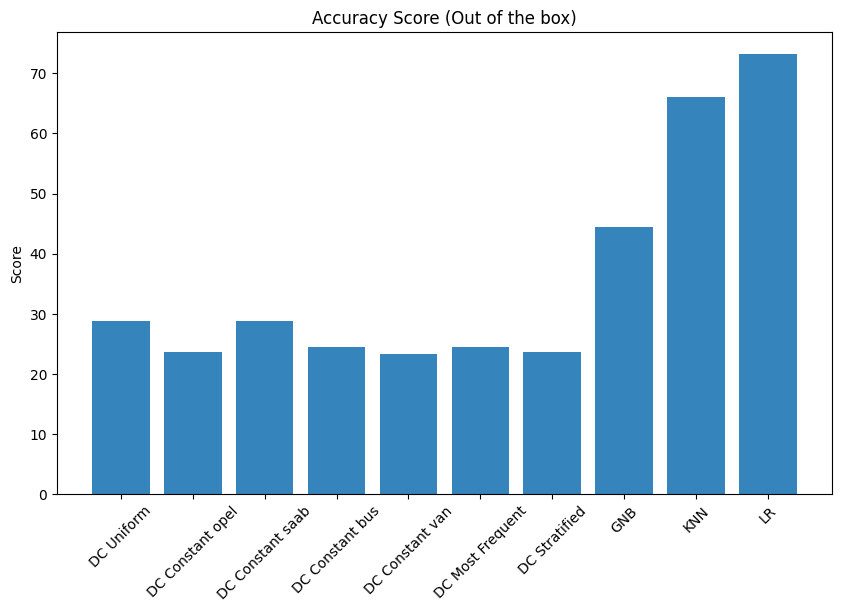

In [155]:
classifier_labels = list(accuracy.keys())
classifier_accuracy = list(accuracy.values())
classifier_f1 = list(f1.values())

bar_plot(classifier_labels, [i*100 for i in classifier_accuracy], "Accuracy Score (Out of the box)")

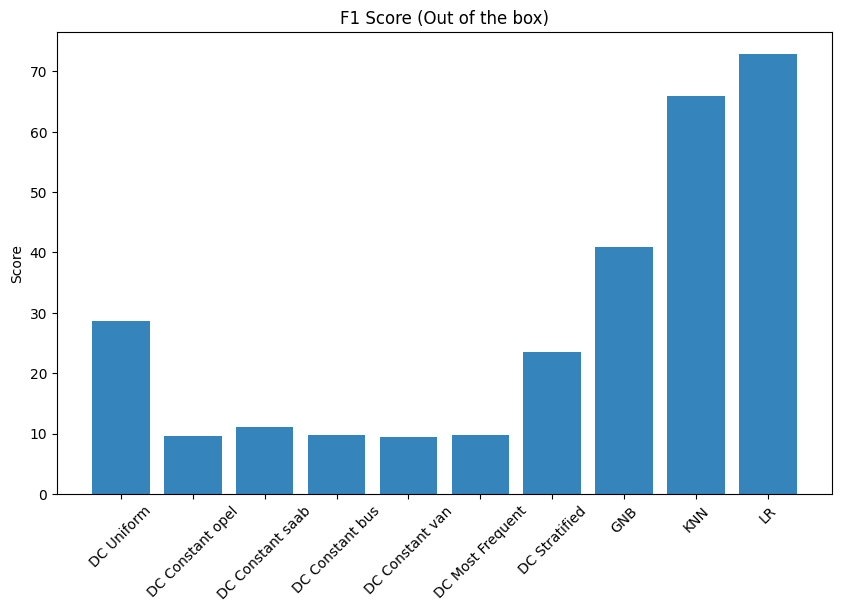

In [156]:
bar_plot(classifier_labels, [i*100 for i in classifier_f1], "F1 Score (Out of the box)")

1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3
